
╔══════════════════════════════════════════════════════════════════════╗
║                   ML TRADING SYSTEM -  V8.7                          ║
║                     PROFITABILITY BOOST                              ║
╚══════════════════════════════════════════════════════════════════════╝

🔧 KEY IMPROVEMENTS:
✅ Smart position sizing based on volatility and trend
✅ Dynamic stop-loss (5-6%) and take-profit (15-18%)
✅ ETH-specific volatility filters
✅ Market regime adaptive parameters
✅ XGBoost ML Engine (Better than Random Forest)
✅ Walk-Forward Validation (Robustness Testing)
✅ FIX: signals now hold position state (no entry-only spikes)
✅ VISUAL: friendlier colors + improved position sizing plot

📊 DATA PERIOD: 2020-01-01 to 2025-12-29


🚀 BITCOIN ML TRADING SYSTEM - PHASE 4 V8.7 (XGBoost + WFV)

📊 Processing BTC-USD with Walk-Forward Validation
------------------------------------------------------------
   📈 Total data: 2189 days
   🔄 WFV Window 1/5: Train=1284 days, Test=214 days 

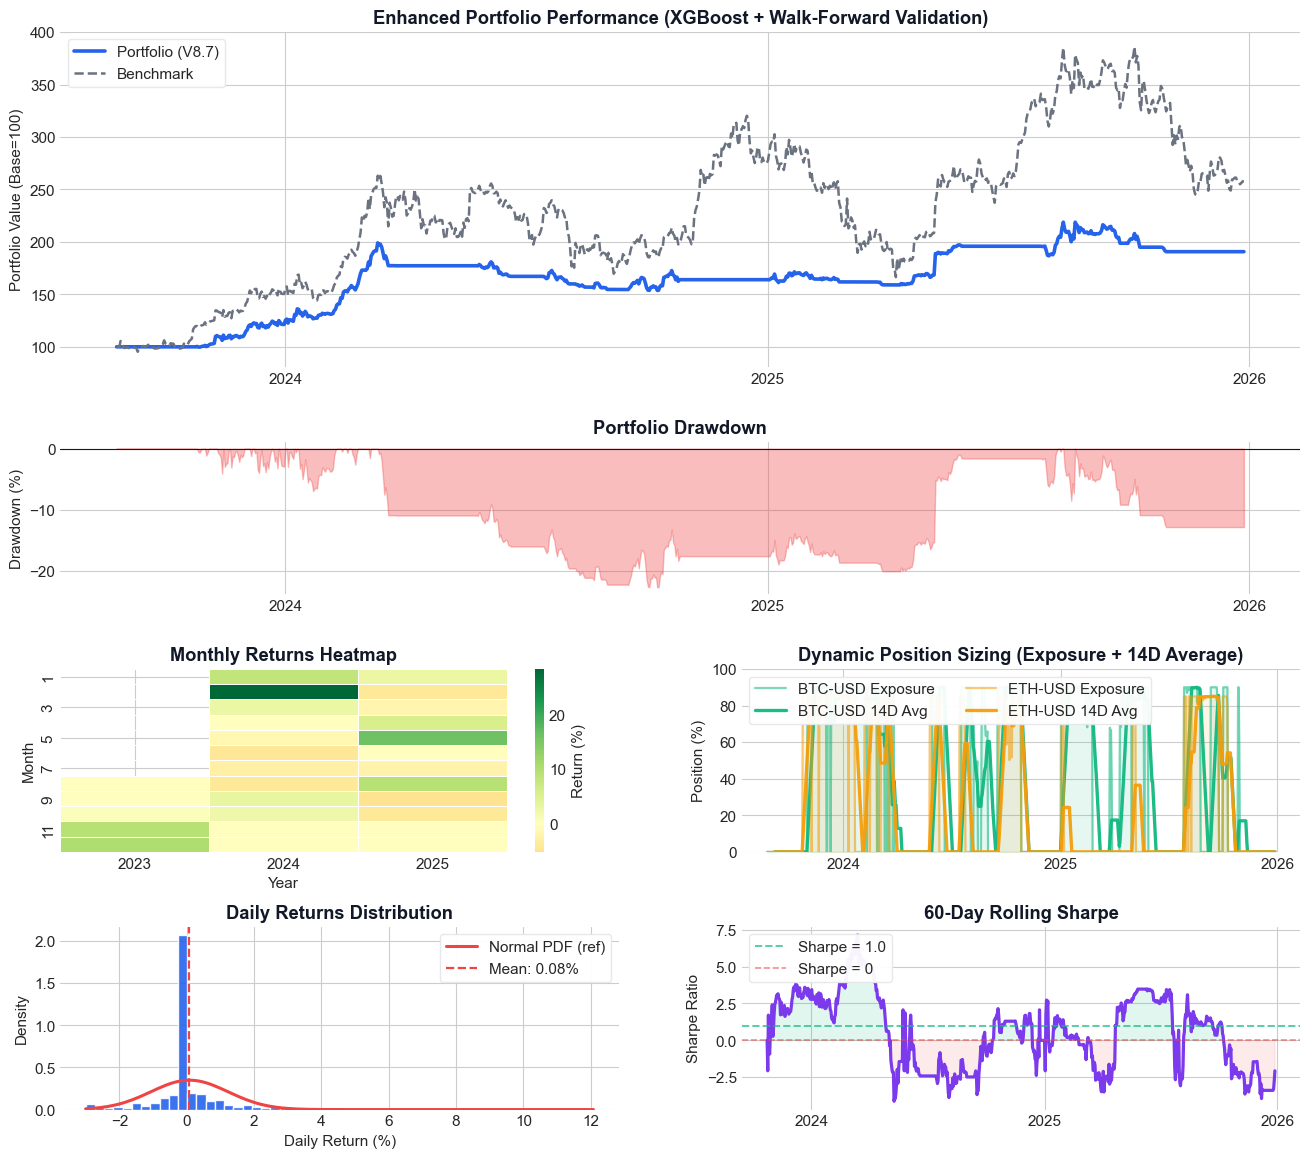


📊 Enhanced visualization saved as 'phase4_v87_results.png'

✅ PHASE 4 V8.7 COMPLETED SUCCESSFULLY

✅ PHASE 4 V8.7 COMPLETED SUCCESSFULLY


In [13]:
# ============================================================================
# 🚀 BITCOIN ML TRADING SYSTEM - PHASE 4 :  V8.7 (VISUAL IMPROVED + FIXED HOLDING)
# Author: DEWA
# Date: December 2025
# ============================================================================
"""
PHASE 4 : PROFITABILITY BOOST
1. Smart position sizing based on volatility and trend
2. Dynamic stop-loss and take-profit
3. Improved ETH strategy with momentum filters
4. Market regime adaptive parameters
5. XGBoost ML Engine Upgrade
6. Walk-Forward Validation
7. ✅ FIX: signals now represent HOLDING state (position persists until exit)
8. ✅ FIX: dynamic position sizing visual now smooth & meaningful (no entry-only spikes)
9. ✅ Visual: friendlier colors, clearer layout, exposure plot improved
"""

import xgboost as xgb
import pandas as pd
import numpy as np
import yfinance as yf
import talib as ta
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

import seaborn as sns
from datetime import datetime, timedelta
from typing import Dict, List, Tuple

import warnings
warnings.filterwarnings("ignore")


# =============================================================================
# VISUAL THEME (FRIENDLY)
# =============================================================================
def set_friendly_theme():
    # Matplotlib friendly defaults (clean + readable)
    plt.rcParams.update({
        "figure.facecolor": "white",
        "axes.facecolor": "white",
        "axes.edgecolor": "#D0D7DE",
        "axes.labelcolor": "#111827",
        "xtick.color": "#374151",
        "ytick.color": "#374151",
        "grid.color": "#E5E7EB",
        "grid.linestyle": "-",
        "grid.linewidth": 0.8,
        "axes.grid": True,
        "axes.titleweight": "bold",
        "font.size": 11,
        "legend.frameon": True,
        "legend.framealpha": 0.95,
        "legend.edgecolor": "#E5E7EB",
    })
    sns.set_style("whitegrid")


# ============================================================================
# 1. SMART CONFIGURATION V8.7
# ============================================================================
class ConfigV87:
    """Smart Configuration for Profitability"""

    ASSETS = ["BTC-USD", "ETH-USD"]

    ASSET_PARAMS = {
        "BTC-USD": {
            "base_position": 0.70,
            "max_position": 0.90,
            "min_position": 0.40,
            "entry_threshold": 0.45,
            "exit_threshold": 0.40,
            "stop_loss": 0.05,     # 5%
            "take_profit": 0.15,   # 15%
            "volatility_mult": 0.8,
            "trend_mult": 1.2,
        },
        "ETH-USD": {
            "base_position": 0.60,
            "max_position": 0.85,
            "min_position": 0.30,
            "entry_threshold": 0.42,
            "exit_threshold": 0.37,
            "stop_loss": 0.06,     # 6%
            "take_profit": 0.18,   # 18%
            "volatility_mult": 0.7,
            "trend_mult": 1.3,
        }
    }

    COMMISSION = 0.001
    SLIPPAGE = 0.0005

    XGB_PARAMS = {
        "n_estimators": 200,
        "max_depth": 6,
        "learning_rate": 0.05,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "reg_alpha": 0.1,
        "reg_lambda": 1.0,
        "random_state": 42,
        "n_jobs": -1,
        "eval_metric": "logloss",
        "use_label_encoder": False,
    }

    MAX_PORTFOLIO_DRAWDOWN = 0.25
    MAX_DAILY_LOSS = 0.03

    WFV_TRAIN_SIZE = 0.6
    WFV_STEP_SIZE = 0.1
    WFV_WINDOWS = 5

    START_DATE = "2020-01-01"
    END_DATE = "2025-12-29"


# ============================================================================
# 2. SMART ML ENGINE V8.7 (XGBOOST)
# ============================================================================
class SmartMLEngineV87:
    """ML engine with XGBoost and profit focus"""

    def __init__(self, symbol: str):
        self.symbol = symbol
        self.model = xgb.XGBClassifier(**ConfigV87.XGB_PARAMS)
        self.scaler = StandardScaler()
        self.is_trained = False

    def prepare_features(self, df: pd.DataFrame) -> Tuple[pd.DataFrame, List[str]]:
        df = df.copy()

        # Price features
        df["RETURN"] = df["Close"].pct_change()
        df["LOG_RETURN"] = np.log(df["Close"] / df["Close"].shift(1))

        # Volatility
        df["VOLATILITY_10"] = df["RETURN"].rolling(10).std()
        df["VOLATILITY_20"] = df["RETURN"].rolling(20).std()

        # Momentum
        df["RSI"] = ta.RSI(df["Close"], timeperiod=14)
        df["RSI_7"] = ta.RSI(df["Close"], timeperiod=7)

        # MACD
        df["MACD"], df["MACD_SIGNAL"], df["MACD_HIST"] = ta.MACD(df["Close"])

        # Moving averages
        df["EMA_10"] = ta.EMA(df["Close"], timeperiod=10)
        df["EMA_20"] = ta.EMA(df["Close"], timeperiod=20)
        df["EMA_50"] = ta.EMA(df["Close"], timeperiod=50)

        # Volume
        df["VOLUME_SMA"] = df["Volume"].rolling(20).mean()
        df["VOLUME_RATIO"] = df["Volume"] / df["VOLUME_SMA"]

        # ATR
        df["ATR"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["ATR_PCT"] = df["ATR"] / df["Close"]

        # Trend strength
        df["ADX"] = ta.ADX(df["High"], df["Low"], df["Close"], timeperiod=14)

        # Price position
        df["HIGH_20"] = df["High"].rolling(20).max()
        df["LOW_20"] = df["Low"].rolling(20).min()
        df["PRICE_POSITION"] = (df["Close"] - df["LOW_20"]) / (df["HIGH_20"] - df["LOW_20"])

        # Market trend score
        df["TREND"] = self._calculate_trend(df)

        # Lags
        for lag in [1, 2, 3]:
            df[f"RETURN_LAG_{lag}"] = df["RETURN"].shift(lag)
            df[f"RSI_LAG_{lag}"] = df["RSI"].shift(lag)

        # Target: Next 3-day return > 2%
        df["TARGET"] = (df["Close"].shift(-3) > df["Close"] * 1.02).astype(int)

        features = [
            "RETURN", "LOG_RETURN",
            "VOLATILITY_10", "VOLATILITY_20",
            "RSI", "RSI_7",
            "MACD", "MACD_HIST",
            "EMA_10", "EMA_20", "EMA_50",
            "VOLUME_RATIO",
            "ATR_PCT",
            "ADX",
            "PRICE_POSITION",
            "TREND",
            "RETURN_LAG_1", "RETURN_LAG_2",
            "RSI_LAG_1", "RSI_LAG_2",
        ]

        available = [f for f in features if f in df.columns]
        df_clean = df.dropna(subset=available + ["TARGET", "Close"])

        return df_clean, available

    def _calculate_trend(self, df: pd.DataFrame) -> pd.Series:
        close = df["Close"].values
        if len(close) < 50:
            return pd.Series(0.0, index=df.index)

        ema_20 = ta.EMA(close, timeperiod=20)
        ema_50 = ta.EMA(close, timeperiod=50)

        trend = np.zeros(len(close), dtype=float)
        for i in range(len(close)):
            if i < 50:
                trend[i] = 0.0
                continue
            if close[i] > ema_20[i] and close[i] > ema_50[i]:
                trend[i] = 1.0
            elif close[i] > ema_20[i]:
                trend[i] = 0.5
            elif close[i] < ema_20[i] and close[i] < ema_50[i]:
                trend[i] = -1.0
            elif close[i] < ema_20[i]:
                trend[i] = -0.5
            else:
                trend[i] = 0.0

        return pd.Series(trend, index=df.index)

    def train(self, df: pd.DataFrame, features: List[str]) -> bool:
        if len(df) < 150:
            return False

        X = df[features].values
        y = df["TARGET"].values

        split_idx = int(len(X) * 0.8)
        X_train, X_val = X[:split_idx], X[split_idx:]
        y_train, y_val = y[:split_idx], y[split_idx:]

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)

        self.model.fit(
            X_train_scaled, y_train,
            eval_set=[(X_val_scaled, y_val)],
            verbose=False
        )

        val_pred = self.model.predict(X_val_scaled)
        # profit proxy: hit-rate conditional on predicted 1
        if (val_pred == 1).sum() > 0:
            val_profit = np.mean(y_val[val_pred == 1])
        else:
            val_profit = 0.0

        print(f"   🧠 XGBoost: Val Profit={val_profit:.3f}")

        self.is_trained = True
        return True

    def predict(self, df: pd.DataFrame, features: List[str]) -> np.ndarray:
        if (not self.is_trained) or len(df) == 0:
            return np.full(len(df), 0.5, dtype=float)

        use_features = [f for f in features if f in df.columns]
        if len(use_features) == 0:
            return np.full(len(df), 0.5, dtype=float)

        X = df[use_features].values
        X_scaled = self.scaler.transform(X)

        proba = self.model.predict_proba(X_scaled)[:, 1]

        # Profit calibration: shift to a practical range (avoid too low)
        proba = 0.4 + 0.5 * proba  # [0.4, 0.9] approx
        return np.clip(proba, 0.35, 0.85)


# ============================================================================
# 3. PROFIT-OPTIMIZED STRATEGY V8.7 (FIXED HOLDING STATE)
# ============================================================================
class ProfitOptimizedStrategy:
    """Strategy optimized for profitability (signals now represent HOLD state)"""

    def __init__(self, symbol: str):
        self.symbol = symbol
        self.params = ConfigV87.ASSET_PARAMS[symbol]

    def generate_signals(self, df: pd.DataFrame, ml_probs: np.ndarray) -> Tuple[pd.Series, pd.Series]:
        n = len(df)
        signals = pd.Series(0, index=df.index, dtype=int)
        strengths = pd.Series(0.0, index=df.index, dtype=float)

        if n < 60:
            return signals, strengths

        close = df["Close"].values
        rsi = df["RSI"].values if "RSI" in df.columns else np.full(n, 50.0)
        volume_ratio = df["VOLUME_RATIO"].values if "VOLUME_RATIO" in df.columns else np.ones(n)

        ema_20 = df["EMA_20"].values if "EMA_20" in df.columns else close
        ema_50 = df["EMA_50"].values if "EMA_50" in df.columns else close

        atr_pct = df["ATR_PCT"].values if "ATR_PCT" in df.columns else np.full(n, 0.02)

        in_position = False
        entry_price = 0.0
        entry_strength = 0.0

        for i in range(60, n):
            price = close[i]

            # =========================
            # If holding: manage exits
            # =========================
            if in_position:
                profit_pct = (price - entry_price) / entry_price

                # TP / SL
                if profit_pct >= self.params["take_profit"] or profit_pct <= -self.params["stop_loss"]:
                    in_position = False
                    signals.iloc[i] = 0
                    strengths.iloc[i] = 0.0
                    entry_price = 0.0
                    entry_strength = 0.0
                    continue

                # ML-based exit
                if ml_probs[i] < self.params["exit_threshold"]:
                    in_position = False
                    signals.iloc[i] = 0
                    strengths.iloc[i] = 0.0
                    entry_price = 0.0
                    entry_strength = 0.0
                    continue

                # Hold
                signals.iloc[i] = 1

                # Strength can evolve (optional): keep it stable but slightly adapt
                # Make it smoother so sizing doesn't jump too hard.
                current_strength = entry_strength
                # Mild adapt: stronger if trend & volume supportive
                if price > ema_50[i]:
                    current_strength = min(1.0, current_strength + 0.03)
                if volume_ratio[i] > 1.2:
                    current_strength = min(1.0, current_strength + 0.02)
                if 40 < rsi[i] < 60:
                    current_strength = min(1.0, current_strength + 0.01)

                strengths.iloc[i] = np.clip(current_strength, 0.1, 1.0)
                entry_strength = strengths.iloc[i]
                continue

            # =========================
            # If flat: evaluate entries
            # =========================
            ml_ok = ml_probs[i] > self.params["entry_threshold"]
            trend_ok = price > ema_20[i]
            rsi_ok = 30 < rsi[i] < 80
            volume_ok = volume_ratio[i] > 0.7

            # ETH volatility filter
            if self.symbol == "ETH-USD":
                volatility_ok = atr_pct[i] < 0.05
            else:
                volatility_ok = True

            if ml_ok and trend_ok and rsi_ok and volume_ok and volatility_ok:
                in_position = True
                entry_price = price

                # Strength score (0.1..1.0)
                strength = 0.0

                # ML confidence (0-0.45)
                ml_strength = (ml_probs[i] - 0.4) / 0.5
                strength += 0.45 * np.clip(ml_strength, 0.0, 1.0)

                # Trend strength (0-0.30)
                if price > ema_50[i]:
                    strength += 0.30
                elif price > ema_20[i]:
                    strength += 0.15

                # Volume strength (0-0.15)
                if volume_ratio[i] > 1.2:
                    strength += 0.15
                elif volume_ratio[i] > 0.9:
                    strength += 0.08

                # RSI sweet spot (0-0.10)
                if 40 < rsi[i] < 60:
                    strength += 0.10

                entry_strength = float(np.clip(strength, 0.1, 1.0))

                signals.iloc[i] = 1
                strengths.iloc[i] = entry_strength

        return signals, strengths


# ============================================================================
# 4. SMART POSITION SIZER V8.7
# ============================================================================
class SmartPositionSizer:
    def __init__(self):
        self.position_history = {}

    def calculate_position(
        self,
        asset: str,
        signal_strength: float,
        ml_prob: float,
        volatility: float,
        trend: float,
        market_regime: str
    ) -> float:
        params = ConfigV87.ASSET_PARAMS[asset]

        base_size = params["base_position"]

        # Signal strength adjustment
        strength_adj = 0.55 + 0.65 * signal_strength
        base_size *= strength_adj

        # ML confidence adjustment
        ml_adj = 0.75 + 0.55 * ((ml_prob - 0.5) * 2.0)
        base_size *= ml_adj

        # Volatility adjustment (inverse)
        vol = max(float(volatility), 0.01)
        vol_adj = params["volatility_mult"] / vol
        vol_adj = np.clip(vol_adj, 0.55, 1.45)
        base_size *= vol_adj

        # Trend adjustment
        if trend > 0:
            trend_adj = 1.0 + params["trend_mult"] * float(trend)
            base_size *= trend_adj

        regime_mult = {
            "strong_bull": 1.25,
            "weak_bull": 1.10,
            "neutral": 1.00,
            "weak_bear": 0.75,
            "strong_bear": 0.55
        }.get(market_regime, 1.0)
        base_size *= regime_mult

        final_size = float(np.clip(base_size, params["min_position"], params["max_position"]))

        self.position_history.setdefault(asset, []).append(final_size)
        return final_size


# ============================================================================
# 5. MARKET REGIME DETECTOR
# ============================================================================
class MarketRegimeDetector:
    def __init__(self, lookback_days: int = 60):
        self.lookback = lookback_days
        self.current_regime = "neutral"
        self.regime_history = []

    def detect_regime(self, df: pd.DataFrame, current_idx: int) -> str:
        if current_idx < self.lookback:
            return "neutral"

        start_idx = max(0, current_idx - self.lookback)
        recent = df.iloc[start_idx:current_idx]
        if len(recent) < 20:
            return "neutral"

        returns = recent["Close"].pct_change().dropna()
        if len(returns) < 10:
            return "neutral"

        avg_return = returns.mean() * 252
        volatility = returns.std() * np.sqrt(252)
        sharpe = (avg_return / volatility) if volatility > 0 else 0.0

        current_price = df["Close"].iloc[current_idx - 1]
        sma_50 = df["Close"].rolling(50).mean().iloc[current_idx - 1]
        sma_200 = df["Close"].rolling(200).mean().iloc[current_idx - 1]

        if current_price > sma_200 and sharpe > 1.0:
            regime = "strong_bull"
        elif current_price > sma_50 and sharpe > 0.5:
            regime = "weak_bull"
        elif current_price < sma_200 and sharpe < -1.0:
            regime = "strong_bear"
        elif current_price < sma_50 and sharpe < -0.5:
            regime = "weak_bear"
        else:
            regime = "neutral"

        self.current_regime = regime
        self.regime_history.append((df.index[current_idx - 1], regime))
        return regime


# ============================================================================
# 6. TRADING SYSTEM V8.7 (XGBOOST + WFV)
# ============================================================================
class ProfitableTradingSystemV87:
    def __init__(self):
        self.config = ConfigV87()
        self.ml_engines = {}
        self.strategies = {}
        self.position_sizer = SmartPositionSizer()
        self.regime_detector = MarketRegimeDetector()
        self.results = {}

    def run(self):
        set_friendly_theme()

        print("\n" + "=" * 80)
        print("🚀 BITCOIN ML TRADING SYSTEM - PHASE 4 V8.7 (XGBoost + WFV)")
        print("=" * 80)

        for symbol in self.config.ASSETS:
            print(f"\n📊 Processing {symbol} with Walk-Forward Validation")
            print("-" * 60)

            self.ml_engines[symbol] = SmartMLEngineV87(symbol)
            self.strategies[symbol] = ProfitOptimizedStrategy(symbol)

            df = self.fetch_data(symbol)
            if df.empty:
                continue

            print(f"   📈 Total data: {len(df)} days")

            df_clean, features = self.ml_engines[symbol].prepare_features(df)
            if len(df_clean) < 500:
                print(f"   ❌ Insufficient data for WFV: {len(df_clean)}")
                continue

            total_windows = self.config.WFV_WINDOWS
            train_ratio = self.config.WFV_TRAIN_SIZE
            step_size = int(len(df_clean) * self.config.WFV_STEP_SIZE)

            all_signals = pd.Series(dtype=int)
            all_strengths = pd.Series(dtype=float)
            all_positions = pd.Series(dtype=float)
            all_returns = pd.Series(dtype=float)
            all_ml_probs = pd.Series(dtype=float)

            for window in range(total_windows):
                train_end = int(len(df_clean) * (train_ratio + window * self.config.WFV_STEP_SIZE))
                test_start = train_end
                test_end = min(test_start + step_size, len(df_clean))

                if test_end - test_start < 60:
                    break

                train_df = df_clean.iloc[:train_end]
                test_df = df_clean.iloc[test_start:test_end]

                print(
                    f"   🔄 WFV Window {window + 1}/{total_windows}: "
                    f"Train={len(train_df)} days, Test={len(test_df)} days "
                    f"({test_df.index[0].date()} to {test_df.index[-1].date()})"
                )

                trained = self.ml_engines[symbol].train(train_df, features)
                if not trained:
                    print("   ⚠️ Training failed, using calibrated predictions")
                    ml_probs = np.full(len(test_df), 0.6, dtype=float)
                else:
                    ml_probs = self.ml_engines[symbol].predict(test_df, features)

                signals, strengths = self.strategies[symbol].generate_signals(test_df, ml_probs)

                positions = self.calculate_smart_positions(symbol, test_df, signals, strengths, ml_probs)
                returns = self.calculate_returns(test_df, positions)

                all_signals = pd.concat([all_signals, signals])
                all_strengths = pd.concat([all_strengths, strengths])
                all_positions = pd.concat([all_positions, positions])
                all_returns = pd.concat([all_returns, returns])
                all_ml_probs = pd.concat([all_ml_probs, pd.Series(ml_probs, index=test_df.index)])

            if len(all_returns) == 0:
                print("   ❌ No valid test results from WFV")
                continue

            bench = df_clean["Close"].pct_change().fillna(0).reindex(all_returns.index)
            self.results[symbol] = {
                "returns": all_returns,
                "signals": all_signals,
                "positions": all_positions,
                "strengths": all_strengths,
                "ml_probs": all_ml_probs,
                "benchmark": bench,
                "test_data": df_clean.reindex(all_returns.index),
            }

            self.print_detailed_metrics(symbol, all_returns, self.results[symbol]["test_data"], all_signals, all_positions)

        if self.results:
            self.generate_comprehensive_report()
        else:
            print("\n❌ No results generated from WFV")

    def fetch_data(self, symbol: str) -> pd.DataFrame:
        try:
            df = yf.download(
                symbol,
                start=self.config.START_DATE,
                end=self.config.END_DATE,
                interval="1d",
                progress=False,
                auto_adjust=True,
            )

            if df.empty:
                raise ValueError(f"No data for {symbol}")

            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.get_level_values(0)

            required = ["Open", "High", "Low", "Close", "Volume"]
            for col in required:
                if col not in df.columns:
                    df[col] = np.nan

            df = df[required].astype(float).dropna()
            return df

        except Exception as e:
            print(f"❌ Error: {e}")
            return pd.DataFrame()

    def calculate_smart_positions(
        self,
        symbol: str,
        df: pd.DataFrame,
        signals: pd.Series,
        strengths: pd.Series,
        ml_probs: np.ndarray,
    ) -> pd.Series:
        positions = pd.Series(0.0, index=df.index, dtype=float)

        volatilities = df["ATR_PCT"].values if "ATR_PCT" in df.columns else np.full(len(df), 0.02)
        trends = df["TREND"].values if "TREND" in df.columns else np.zeros(len(df))

        for i in range(len(df)):
            if signals.iloc[i] == 1:
                regime = self.regime_detector.detect_regime(df, i)

                positions.iloc[i] = self.position_sizer.calculate_position(
                    asset=symbol,
                    signal_strength=float(strengths.iloc[i]),
                    ml_prob=float(ml_probs[i]),
                    volatility=float(volatilities[i]) if i < len(volatilities) else 0.02,
                    trend=float(trends[i]) if i < len(trends) else 0.0,
                    market_regime=regime,
                )
            else:
                positions.iloc[i] = 0.0

        return positions

    def calculate_returns(self, df: pd.DataFrame, positions: pd.Series) -> pd.Series:
        if "Close" not in df.columns:
            return pd.Series(dtype=float)

        asset_returns = df["Close"].pct_change().fillna(0.0)

        # Execute positions next day (avoid lookahead)
        pos_exec = positions.shift(1).fillna(0.0)

        gross = pos_exec * asset_returns

        # Costs only when changing position
        pos_change = positions.diff().abs().fillna(0.0)
        costs = pos_change * (self.config.COMMISSION + self.config.SLIPPAGE)

        net = gross - costs

        # Daily loss cap
        net = net.clip(lower=-self.config.MAX_DAILY_LOSS)
        return net.fillna(0.0)

    def print_detailed_metrics(
        self,
        symbol: str,
        returns: pd.Series,
        df: pd.DataFrame,
        signals: pd.Series,
        positions: pd.Series
    ):
        if len(returns) == 0:
            print("   ❌ No returns")
            return

        total_return = (1 + returns).prod() - 1
        bh_return = (1 + df["Close"].pct_change().fillna(0)).prod() - 1

        if returns.std() > 0:
            sharpe = returns.mean() / returns.std() * np.sqrt(252)
            downside = returns[returns < 0]
            sortino = returns.mean() / (downside.std() if downside.std() > 0 else 1e-12) * np.sqrt(252)
        else:
            sharpe = 0.0
            sortino = 0.0

        winning = returns[returns > 0]
        losing = returns[returns < 0]

        win_rate = (returns > 0).sum() / len(returns) * 100
        profit_factor = (winning.sum() / abs(losing.sum())) if abs(losing.sum()) > 1e-12 else float("inf")

        cum = (1 + returns).cumprod()
        dd = (cum / cum.cummax() - 1.0)
        max_dd = dd.min()
        avg_dd = dd[dd < 0].mean() if (dd < 0).any() else 0.0

        exposure_pct = (signals.sum() / len(signals)) * 100
        avg_pos = positions[positions > 0].mean()
        avg_pos = 0.0 if np.isnan(avg_pos) else float(avg_pos)

        avg_win = winning.mean() if len(winning) else 0.0
        avg_loss = losing.mean() if len(losing) else 0.0
        win_loss_ratio = (abs(avg_win / avg_loss) if abs(avg_loss) > 1e-12 else float("inf"))

        print(f"   📊 {symbol} Performance:")
        print(f"      Return:         {total_return:+.2%} (B&H: {bh_return:+.2%})")
        print(f"      Sharpe:         {sharpe:.2f}")
        print(f"      Sortino:        {sortino:.2f}")
        print(f"      Win Rate:       {win_rate:.1f}%")
        print(f"      Profit Factor:  {profit_factor:.2f}")
        print(f"      Win/Loss Ratio: {win_loss_ratio:.2f}")
        print(f"      Max Drawdown:   {max_dd:.2%}")
        print(f"      Avg Drawdown:   {avg_dd:.2%}")
        print(f"      Exposure:       {exposure_pct:.1f}%")
        print(f"      Avg Position:   {avg_pos:.1%}")
        print(f"      Avg Win:        {avg_win:.2%}")
        print(f"      Avg Loss:       {avg_loss:.2%}")

    def generate_comprehensive_report(self):
        print("\n" + "=" * 80)
        print("🏆 COMPREHENSIVE PERFORMANCE REPORT - PHASE 4 V8.7 (XGBoost + WFV)")
        print("=" * 80)

        portfolio_returns = None
        benchmark_returns = None

        for symbol, result in self.results.items():
            if portfolio_returns is None:
                portfolio_returns = result["returns"].copy()
                benchmark_returns = result["benchmark"].copy()
            else:
                portfolio_returns = portfolio_returns.add(result["returns"], fill_value=0.0)
                benchmark_returns = benchmark_returns.add(result["benchmark"], fill_value=0.0)

        portfolio_returns = portfolio_returns / len(self.results)
        benchmark_returns = benchmark_returns / len(self.results)

        total_return = (1 + portfolio_returns).prod() - 1
        bench_return = (1 + benchmark_returns).prod() - 1
        outperformance = total_return - bench_return

        if portfolio_returns.std() > 0:
            sharpe = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)
            downside = portfolio_returns[portfolio_returns < 0]
            sortino = portfolio_returns.mean() / (downside.std() if downside.std() > 0 else 1e-12) * np.sqrt(252)
        else:
            sharpe = 0.0
            sortino = 0.0

        cum = (1 + portfolio_returns).cumprod()
        dd = (cum / cum.cummax() - 1.0)
        max_dd = dd.min()

        win_rate = (portfolio_returns > 0).sum() / len(portfolio_returns) * 100

        print("\n📈 PORTFOLIO SUMMARY:")
        print(f"   Total Return:     {total_return:+.2%}")
        print(f"   Benchmark:        {bench_return:+.2%}")
        print(f"   Outperformance:   {outperformance:+.2%}")
        print(f"   Sharpe Ratio:     {sharpe:.2f}")
        print(f"   Sortino Ratio:    {sortino:.2f}")
        print(f"   Max Drawdown:     {max_dd:.2%}")
        print(f"   Win Rate:         {win_rate:.1f}%")
        print(f"   Volatility:       {portfolio_returns.std() * np.sqrt(252):.2%}")

        print("\n💼 ASSET BREAKDOWN:")
        for symbol, result in self.results.items():
            asset_return = (1 + result["returns"]).prod() - 1
            exposure = (result["signals"].sum() / len(result["signals"])) * 100
            avg_pos = result["positions"][result["positions"] > 0].mean()
            avg_pos = 0.0 if np.isnan(avg_pos) else float(avg_pos)

            r = result["returns"]
            s = (r.mean() / r.std() * np.sqrt(252)) if r.std() > 0 else 0.0

            print(f"   {symbol}:")
            print(f"      Return:    {asset_return:+.2%}")
            print(f"      Exposure:  {exposure:.1f}%")
            print(f"      Avg Pos:   {avg_pos:.1%}")
            print(f"      Sharpe:    {s:.2f}")

        self.create_enhanced_visualization(portfolio_returns, benchmark_returns)

        print("\n" + "=" * 80)
        print("✅ PHASE 4 V8.7 COMPLETED SUCCESSFULLY")
        print("=" * 80)

    def create_enhanced_visualization(self, portfolio_returns: pd.Series, benchmark_returns: pd.Series):
        if len(portfolio_returns) == 0:
            return

        # Friendly palette (soft but clear)
        colors = {
            "portfolio": "#2563EB",   # blue
            "benchmark": "#6B7280",   # gray
            "drawdown": "#EF4444",    # red
            "btc": "#10B981",         # green
            "eth": "#F59E0B",         # amber
            "accent": "#7C3AED",      # purple
        }

        fig = plt.figure(figsize=(16, 14))
        gs = gridspec.GridSpec(4, 2, height_ratios=[2.2, 1.0, 1.2, 1.2], hspace=0.35, wspace=0.22)

        # 1) Equity Curve
        cum_portfolio = (1 + portfolio_returns).cumprod()
        cum_benchmark = (1 + benchmark_returns).cumprod()

        ax1 = fig.add_subplot(gs[0, :])
        ax1.plot(cum_portfolio.index, cum_portfolio * 100, label="Portfolio (V8.7)", linewidth=2.6, color=colors["portfolio"])
        ax1.plot(cum_benchmark.index, cum_benchmark * 100, label="Benchmark", linewidth=1.8, color=colors["benchmark"], linestyle="--")

        ax1.fill_between(
            cum_portfolio.index,
            (cum_portfolio * 100).values,
            (cum_benchmark * 100).values,
            where=(cum_portfolio.values >= cum_benchmark.values),
            alpha=0.12,
            color=colors["portfolio"]
        )

        ax1.set_title("Enhanced Portfolio Performance (XGBoost + Walk-Forward Validation)")
        ax1.set_ylabel("Portfolio Value (Base=100)")
        ax1.legend(loc="upper left")
        ax1.xaxis.set_major_locator(mdates.YearLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

        # 2) Drawdown
        running_max = cum_portfolio.cummax()
        drawdown = (cum_portfolio / running_max - 1.0)

        ax2 = fig.add_subplot(gs[1, :])
        ax2.fill_between(drawdown.index, (drawdown * 100).values, 0, color=colors["drawdown"], alpha=0.35)
        ax2.axhline(0, color="#111827", linewidth=0.8)
        ax2.set_title("Portfolio Drawdown")
        ax2.set_ylabel("Drawdown (%)")
        ax2.xaxis.set_major_locator(mdates.YearLocator())
        ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

        # 3) Monthly Returns Heatmap (more readable)
        ax3 = fig.add_subplot(gs[2, 0])
        returns_df = pd.DataFrame({"Returns": portfolio_returns})
        returns_df["Year"] = returns_df.index.year
        returns_df["Month"] = returns_df.index.month
        monthly = returns_df.groupby(["Year", "Month"])["Returns"].sum().unstack()

        sns.heatmap(
            monthly.T * 100,
            center=0,
            cmap="RdYlGn",
            annot=False,
            linewidths=0.5,
            cbar_kws={"label": "Return (%)"},
            ax=ax3
        )
        ax3.set_title("Monthly Returns Heatmap")
        ax3.set_xlabel("Year")
        ax3.set_ylabel("Month")

        # 4) Dynamic Position Sizing (FIXED + SMOOTHER)
        ax4 = fig.add_subplot(gs[2, 1])

        # Plot each asset exposure as % with rolling mean overlay
        for symbol in self.results.keys():
            pos = self.results[symbol]["positions"].copy()

            # Rolling exposure to smooth (positions are already holding-state now)
            pos_roll = pos.rolling(14).mean()

            c = colors["btc"] if symbol == "BTC-USD" else colors["eth"]
            ax4.plot(pos.index, pos * 100, linewidth=1.6, alpha=0.55, color=c, label=f"{symbol} Exposure")
            ax4.plot(pos_roll.index, pos_roll * 100, linewidth=2.4, alpha=0.95, color=c, label=f"{symbol} 14D Avg")

            # area fill for readability
            ax4.fill_between(pos.index, (pos * 100).values, 0, color=c, alpha=0.10)

        ax4.set_title("Dynamic Position Sizing (Exposure + 14D Average)")
        ax4.set_ylabel("Position (%)")
        ax4.set_ylim(0, 100)
        ax4.legend(loc="upper left", ncol=2)
        ax4.xaxis.set_major_locator(mdates.YearLocator())
        ax4.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

        # 5) Returns Distribution (no scipy)
        ax5 = fig.add_subplot(gs[3, 0])

        ret_pct = (portfolio_returns * 100).dropna().values
        ax5.hist(ret_pct, bins=55, edgecolor="white", alpha=0.9, density=True, color=colors["portfolio"])

        # Normal PDF overlay (manual)
        mu = float(np.mean(ret_pct)) if len(ret_pct) else 0.0
        sigma = float(np.std(ret_pct)) if len(ret_pct) else 1.0
        sigma = sigma if sigma > 1e-12 else 1e-12

        x = np.linspace(ret_pct.min() if len(ret_pct) else -5, ret_pct.max() if len(ret_pct) else 5, 140)
        pdf = (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

        ax5.plot(x, pdf, linewidth=2.2, color=colors["drawdown"], label="Normal PDF (ref)")
        ax5.axvline(mu, color=colors["drawdown"], linestyle="--", linewidth=1.6, label=f"Mean: {mu:.2f}%")

        ax5.set_title("Daily Returns Distribution")
        ax5.set_xlabel("Daily Return (%)")
        ax5.set_ylabel("Density")
        ax5.legend(loc="upper right")

        # 6) Rolling Sharpe
        ax6 = fig.add_subplot(gs[3, 1])
        roll_window = 60

        def sharpe_roll(x):
            s = np.std(x)
            return (np.mean(x) / s * np.sqrt(252)) if s > 1e-12 else 0.0

        rolling_sharpe = portfolio_returns.rolling(roll_window).apply(sharpe_roll, raw=True)

        ax6.plot(rolling_sharpe.index, rolling_sharpe.values, linewidth=2.3, color=colors["accent"])
        ax6.axhline(1.0, color=colors["btc"], linestyle="--", linewidth=1.4, alpha=0.7, label="Sharpe = 1.0")
        ax6.axhline(0.0, color=colors["drawdown"], linestyle="--", linewidth=1.2, alpha=0.6, label="Sharpe = 0")

        ax6.fill_between(
            rolling_sharpe.index,
            rolling_sharpe.values,
            0,
            where=(rolling_sharpe.values >= 0),
            alpha=0.12,
            color=colors["btc"]
        )
        ax6.fill_between(
            rolling_sharpe.index,
            rolling_sharpe.values,
            0,
            where=(rolling_sharpe.values < 0),
            alpha=0.10,
            color=colors["drawdown"]
        )

        ax6.set_title(f"{roll_window}-Day Rolling Sharpe")
        ax6.set_ylabel("Sharpe Ratio")
        ax6.legend(loc="upper left")
        ax6.xaxis.set_major_locator(mdates.YearLocator())
        ax6.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

        plt.tight_layout()
        plt.savefig("phase4_v87_results.png", dpi=160, bbox_inches="tight")
        plt.show()

        print("\n📊 Enhanced visualization saved as 'phase4_v87_results.png'")


# ============================================================================
# 7. MAIN EXECUTION
# ============================================================================
if __name__ == "__main__":
    print(r"""
╔══════════════════════════════════════════════════════════════════════╗
║                   ML TRADING SYSTEM -  V8.7                          ║
║                     PROFITABILITY BOOST                              ║
╚══════════════════════════════════════════════════════════════════════╝

🔧 KEY IMPROVEMENTS:
✅ Smart position sizing based on volatility and trend
✅ Dynamic stop-loss (5-6%) and take-profit (15-18%)
✅ ETH-specific volatility filters
✅ Market regime adaptive parameters
✅ XGBoost ML Engine (Better than Random Forest)
✅ Walk-Forward Validation (Robustness Testing)
✅ FIX: signals now hold position state (no entry-only spikes)
✅ VISUAL: friendlier colors + improved position sizing plot

📊 DATA PERIOD: 2020-01-01 to 2025-12-29
""")

    system = ProfitableTradingSystemV87()
    system.run()

    print("\n" + "=" * 80)
    print("✅ PHASE 4 V8.7 COMPLETED SUCCESSFULLY")
    print("=" * 80)
